In [259]:
# Step 1.1: Load and inspect dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("Mall_Customers.csv")
df.columns = df.columns.str.strip()  # Remove any accidental spaces in column names

# Show first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [261]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [262]:
df.drop('CustomerID', axis=1, inplace=True)
df.shape

(200, 4)

In [263]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


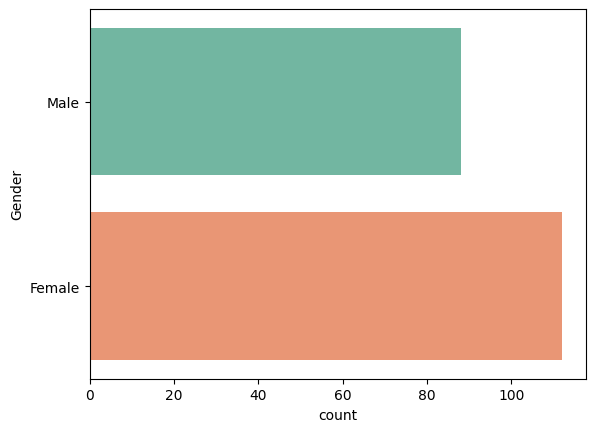

In [264]:
# Gender distribution
sns.countplot(y='Gender', data=df, palette='Set2');

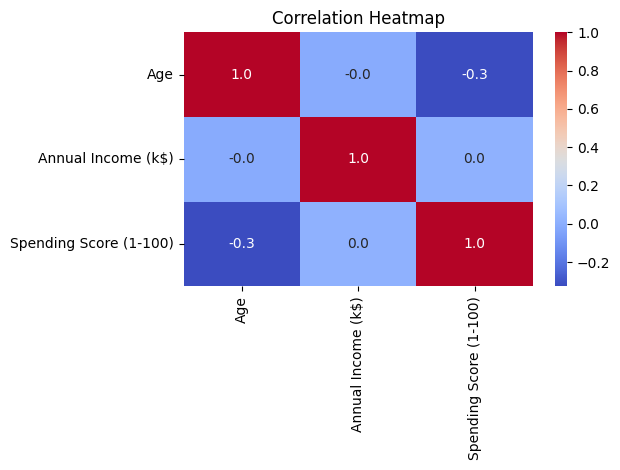

In [ ]:
# use heatmap
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [267]:
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

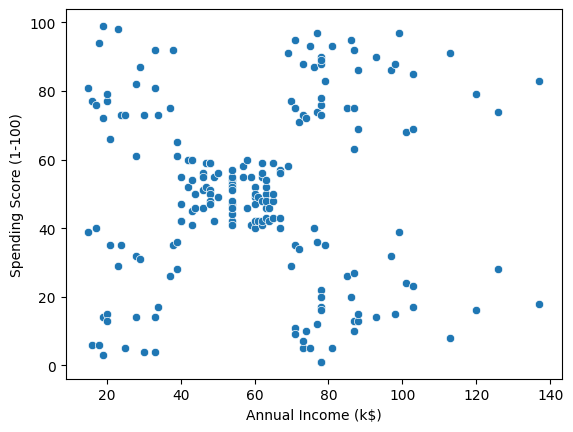

In [ ]:
sns.scatterplot(x=df1['Annual Income (k$)'], y=df1['Spending Score (1-100)'])

In [269]:
# kmeans clusterings

errors = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df1)
  errors.append(kmeans.inertia_)

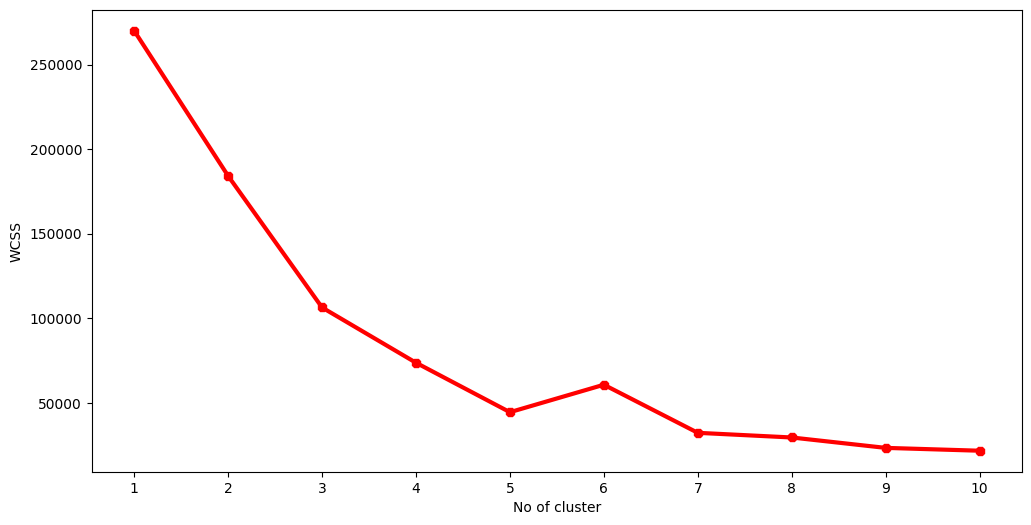

In [270]:
# plot the result for elbow method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No of cluster')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [271]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,1
1,15,81,4
2,16,6,1
3,16,77,4
4,17,40,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

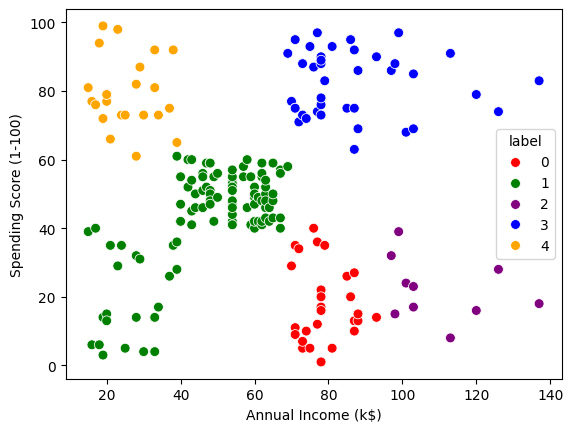

In [272]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='label', s=50, palette=['red', 'green', 'purple', 'blue', 'orange'])

In [273]:
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [274]:
# kmeans clusterings

errors = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df2)
  errors.append(kmeans.inertia_)

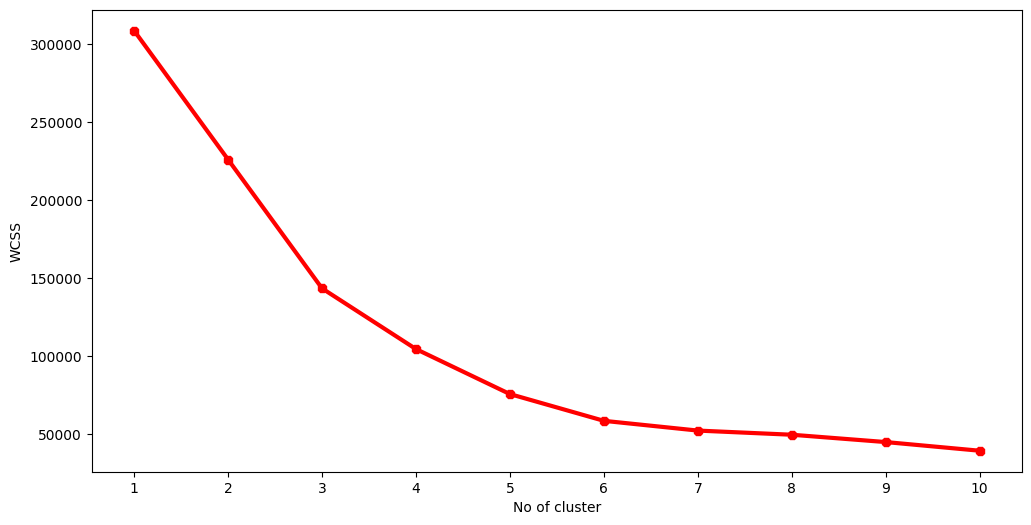

In [275]:
# plot the result for elbow method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No of cluster')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [276]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,label
0,15,39,19,4
1,15,81,21,1
2,16,6,20,4
3,16,77,23,1
4,17,40,31,4


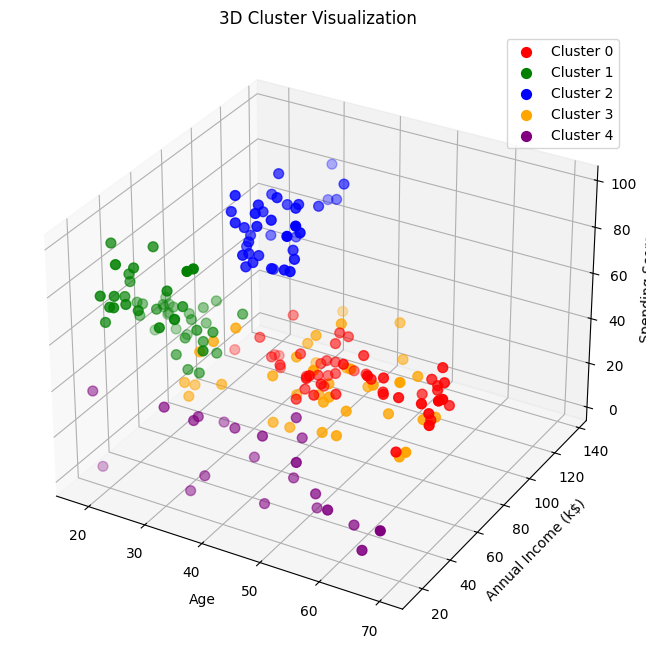

In [277]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Strip column names of hidden whitespace/tab characters
df2.columns = df2.columns.str.strip()

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, color in enumerate(colors):
    cluster = df2[df2['label'] == i]
    ax.scatter(cluster['Age'], cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
               c=color, label=f'Cluster {i}', s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')

plt.title('3D Cluster Visualization')
ax.legend()
plt.show()


In [278]:
## Use DBSCAN for more detail analysis
from sklearn.cluster import DBSCAN

# Fit DBSCAN on the scaled data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to DataFrame
df['DBSCAN_Cluster'] = dbscan_labels


In [279]:
df['DBSCAN_Cluster'].value_counts().sort_index()

,count
DBSCAN_Cluster,
-1,60
0,17
1,5
2,51
3,28
4,32
5,7


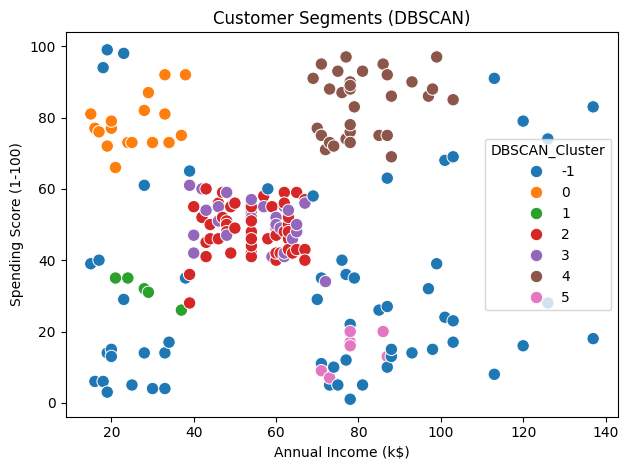

In [280]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='DBSCAN_Cluster', palette='tab10', s=80)
plt.title("Customer Segments (DBSCAN)")
plt.tight_layout()
plt.show()


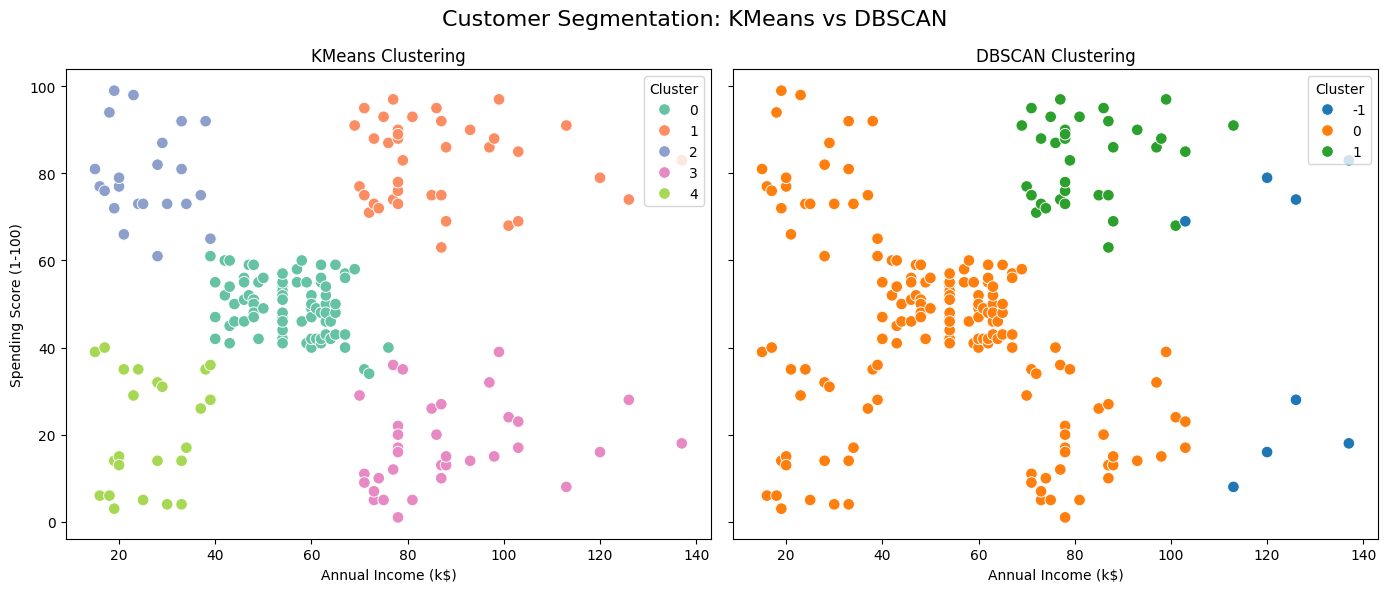

In [ ]:
# Clean column names (important!)
df.columns = df.columns.str.strip()

# Optional: Standardize features (especially useful for DBSCAN)
scaler = StandardScaler()
X = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can tune these
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Plotting side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# KMeans Plot
sns.scatterplot(
    ax=axes[0],
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='KMeans_Cluster',
    palette='Set2',
    s=70
)
axes[0].set_title('KMeans Clustering')
axes[0].legend(title='Cluster', loc='upper right')

# DBSCAN Plot
sns.scatterplot(
    ax=axes[1],
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='tab10',
    s=70
)
axes[1].set_title('DBSCAN Clustering')
axes[1].legend(title='Cluster', loc='upper right')

plt.suptitle('Customer Segmentation: KMeans vs DBSCAN', fontsize=16)
plt.tight_layout()
plt.show()
